# Ngix 컨테이너

**nginx**
- 아파치와 같은 웹 서버 소프트웨어
- 최근 점유율 급격히 늘어남
- 이미지 이름은 nginx

In [ ]:
# run 커맨드 실행
# nginx000ex6 이름
# 포트 번호 8084
# 이미지 이름 nginx
docker run --name nginx000ex6 -d -p 8084:80 nginx

# 컨테이너 실행 중인지 확인
docker ps

# 웹 브라우저 접근
http://localhost:8084/
        
# 컨테이너 종료
docker stop nginx000ex6

# 컨테이너 삭제
docker rm nginx000ex6

# 컨테이너 삭제 확인
docker ps -a

## 성공 결과

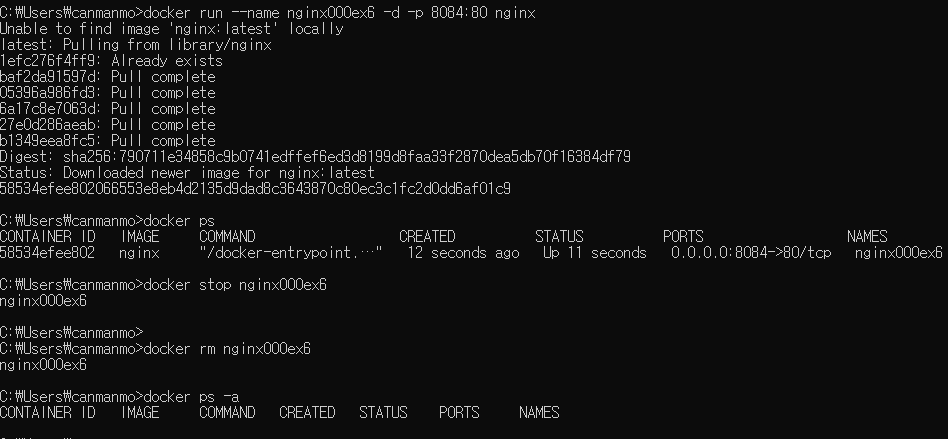

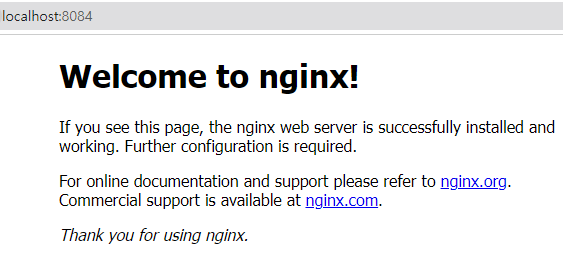

# MySQL 컨테이너

**MySQL**
- 데이터베이스 기능 제공하는 소프트웨어
- RDBMS : PostgreSQL, MariaDB 등 
- WordPress와 함께 쓰임 

**MySQL 컨테이너**
- 제대로 동작하게 하려면 인자 반드시 지정

In [ ]:
# run 커맨드 실행
# -e MYSQL_ROOT_PASSWORD MySQL의 루트 패스워드를 지정
# 이미지 이름 mysql
# -dit 백그라운드에서 실행 및 키보드를 통해 컨테이너 내부의 파일 시스템을 조직 
docker run --name mysql000ex7 -dit -e MYSQL_ROOT_PASSWORD=myrootpass mysql

# 컨테이너 실행 중인지 확인
docker ps

# 컨테이너 종료
docker stop mysql000ex7

# 컨테이너 삭제
docker rm mysql000ex7

# 컨테이너 삭제 확인
docker ps -a

## 성공 결과

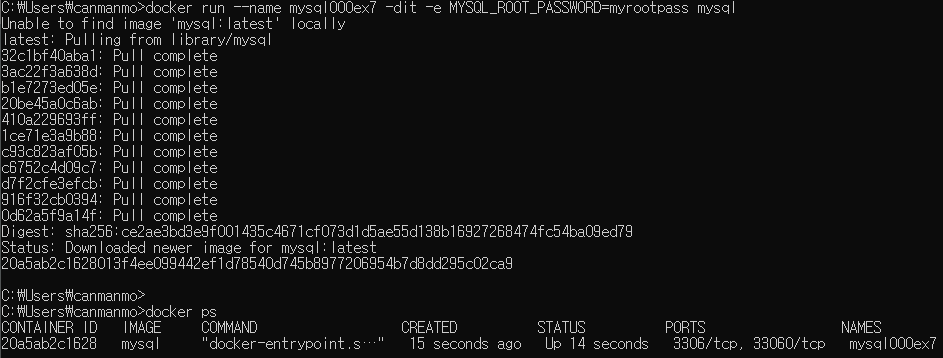

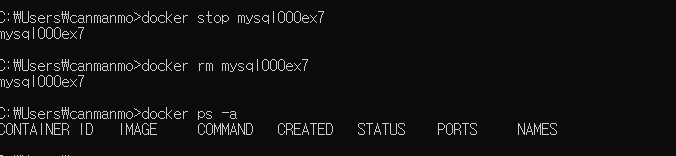

# 이미지 삭제

- 컨테이너를 삭제해도 이미지는 그대로 남아 쌓임
- 이미지가 늘어나면 스토리지 용량을 압박하게 되므로 필요없어진 이미지는 그때그때 삭제
- 이미지를 삭제할 때는 이미지 ID 또는 이미지 이름으로 지정
- 실행한 컨테이너가 남아 있으면 이미지 삭제 불가 
- 컨테이너 목록 출력해 확인하고 컨테이너를 먼저 종료 및 삭제한 다음 이미지 삭제

**이미지 삭제 커맨드**
- docker image rm 
- docker rm은 docker container rm의 생략형이므로 이미지가 아닌 컨테이너가 삭제
- docker image rm 이미지_이름
- 여러 개의 이미지 지정
  - docker image rm 이미지_이름 이미지_이름 이미지_이름 
  
**이미지 목록 커맨드**
- docker image ls
- ps와 달리 -a 옵션 사용 안 됨
- 이미지는 컨테이너와 달리 '실행 중', '종료' 등의 상태 가질 수 없기 때문

**이미지 버전**
- 특정 버전의 이미지 사용 때는 이미지_이름:버전_넘버 지정 
- docker run --name apa000ex2 -d -p 8080:80 httpd:2.2
- docker image rm httpd:2.2

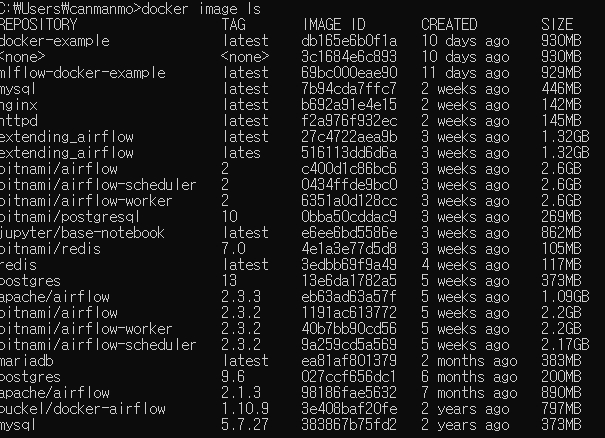

In [ ]:
# 대상 이미지로 실행한 컨테이너 존재 확인
docker ps -a

# 현재 존재하는 이미지 목록 확인
docker image ls

# 이미지 삭제
docker image rm httpd

# 이미지 삭제 확인
docker image ls

# 이미지 삭제 
docker image rm nginx mysql

# 이미지 삭제 확인 
docker image ls

## 성공 결과

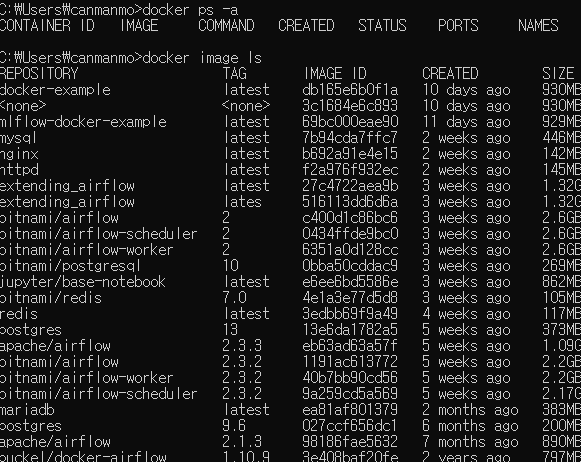

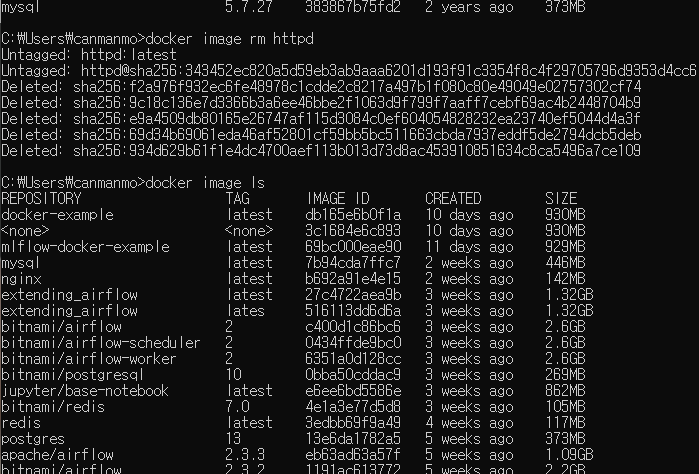

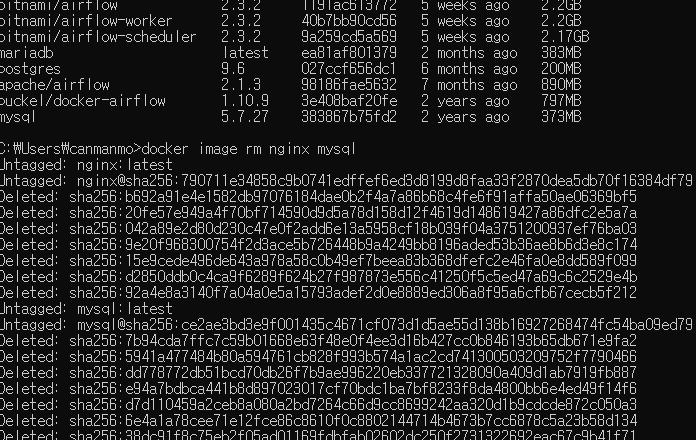

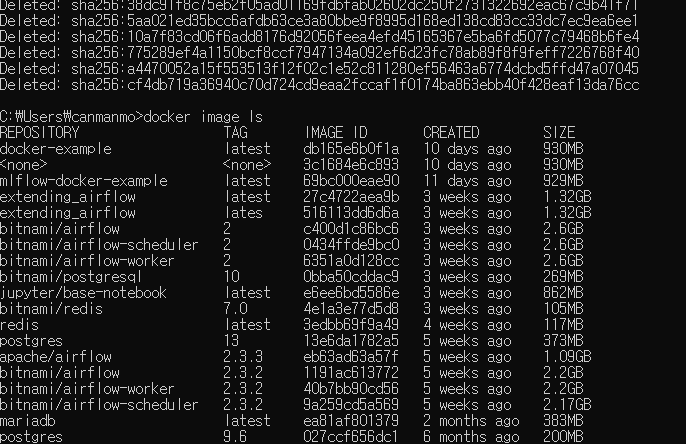

# 여러 개의 컨테이너 연동

## 워드프레스 구축

**워드프레스**
- 웹 사이트를 만들기 위한 소프트웨어
- 서버에 설치해 사용
- 유사한 소프트웨어로 Movable Type 등이 있음
- MySQL 및 MariaDB 지원 
- 아파치나 데이터베이스, PHP 런타임 등을 필요로 함
- 블로그 생성 도구와 같은 것으로, 웹 사이트 잓어자가 작성한 내용을 데이터 베이스에 저장하고, 웹 사이트 열람자의 요청에 따라 웹 페이지 보여줌 
- 프로그램이 MySQL에 저장된 데이터를 읽고 쓸 수 있어야 하기 때문에 두 컨테이너 연결돼 있어야 함 

**워드프레스 이미지**
- 워드프레스 프로그램 본체와 아파치, PHP 런타임 함께 포함

**도커 네트워크 생성/삭제**
- 워드프레스는 워드프레스 컨테이너와 MySQL 컨테이너로 구성됨
- 컨테이너를 두 개 만들기만 해서는 두 컨테이너 연결 안됨
- 가상 네트워크 만들고 이 네트워크에 두 개 컨테이너 소속시켜 두 컨테이너 연결

**가상 네트워크 만드는 커맨드**
- docker network create 네트워크_이름
- 옵션이나 인자를 추가하는 경우는 거의 없음 
- 네트워크를 생성한 다음 컨테이너에서 네트워크에 접속하게 설정

**가상 네트워크 삭제 커맨드**
- docker network rm 네트워크_이름

**MySQL 컨테이너 실행 시에 필요한 옵션과 인자**
- docker run --name 컨테이너 이름 -dit --net=네트워크_이름 -e MYSQL_ROOT_PASSWORD=MySQL_루트_패스워드 -e MYSQL_DATABASE=데이터베이스_이름 -e MYSQL_USER=MySQL_사용자이름 -e MYSQL_PASSWORD=MySQL_패스워드 mysql --character-set-server=문자_인코딩 --collation-server=정렬_순서 --default-authentication-plugin=인증_방식
- --net은 컨테이너를 연결할 도커 니트워크, 나머지는 모두 -e 옵션으로 환경변수 설정 

**환경 변수**
- 운영체제에서 다양한 설정값을 저장하는 장소
- 컨테이너의 설정값을 이 환경변수를 통해 전달하는 경우 많음
- 어떤 환경변수를 사용하지는 컨테이너 종류에 따라 달라짐

**MySQL 사용자 패스워드와 사용자명**
- 패스워드는 루트 패스워드와 일반 사용자 패스워드 두 가지 설정
- 루트는 모든 권한을 가진 사용자지만 매번 루트 사용자로 접속할 경우 보안 측면에서 문제가 생기기 때문에 제한된 권한을 가진 일반 사용자로 전환
- 사용자 이름은 일반 사용자의 이름 

**MySQL 인자**
- 도커에서 사용되는 옵션이 아니라 MySQL 컨테이너에서만 사용
- --character-set-server=문자_인코딩 
- --collation-server=정렬_순서 
- --default-authentication-plugin=인증_방식 
- 인증 방식의 경우 MySQL5에서 MySQL8로 넘어오면서 외부 소프트웨어가 MySQL에 접속하는 인증 방식 바꾸었기 때문 
- 워드프레스는 MySQL 8.0에 접속할 수 없음 

**워드프레스 컨테이너 실행 시에 필요한 옵션과 인자**
- docker run -name 컨테이너_이름 -dit --net=네트워크_이름 -p 포트_설정 -e WORDPRESS_DB_HOST=데이터베이스_컨테이너_이름 -e WORDPRESS_DB_NAME=데이터베이스_이름 -e WORDPRESS_DB_USER=데이터베이스_사용자_이름 -e WORDPRESS_DB_PASSWORD=데이터베이스_패스워드 wordpress
- 연동될 데이터베시스에 대한 정보 설정
- MySQL 컨테이너 설정값과 동일한 값이어야 함 

In [ ]:
# 네트워크 생성
docker network create wordpress000net1

# 네트워크 생성 확인
docker network ls

# MySQL 컨테이너 생성 및 실행
docker run --name mysql000ex11 -dit --net=wordpress000net1 -e MYSQL_ROOT_PASSWORD=myrootpass -e MYSQL_DATABASE=wordpress000db -e MYSQL_USER=wordpress000kun -e MYSQL_PASSWORD=wkunpass mysql --character-set-server=utf8mb4 --collation-server=utf8mb4_unicode_ci --default-authentication-plugin=mysql_native_password

# WordPress 컨테이너 생성 및 실행
docker run --name wordpress000ex12 -dit --net=wordpress000net1 -p 8085:80 -e WORDPRESS_DB_HOST=mysql000ex11 -e WORDPRESS_DB_NAME=wordpress000db -e WORDPRESS_DB_USER=wordpress000kun -e WORDPRESS_DB_PASSWORD=wkunpass wordpress

# 실행 컨테이너 확인 
docker ps

# 웹 브라우저 접근
http://localhost:8085/

# 컨테이너 종료 
docker stop wordpress000ex12
docker stop mysql000ex11

# 컨테이너 삭제
docker rm wordpress000ex12
docker rm mysql000ex11

# 이미지 삭제
docker image rm wordpress
docker imager rm mysql 

# 네트워크 삭제
docker network rm wordpress000net1

## 성공 결과

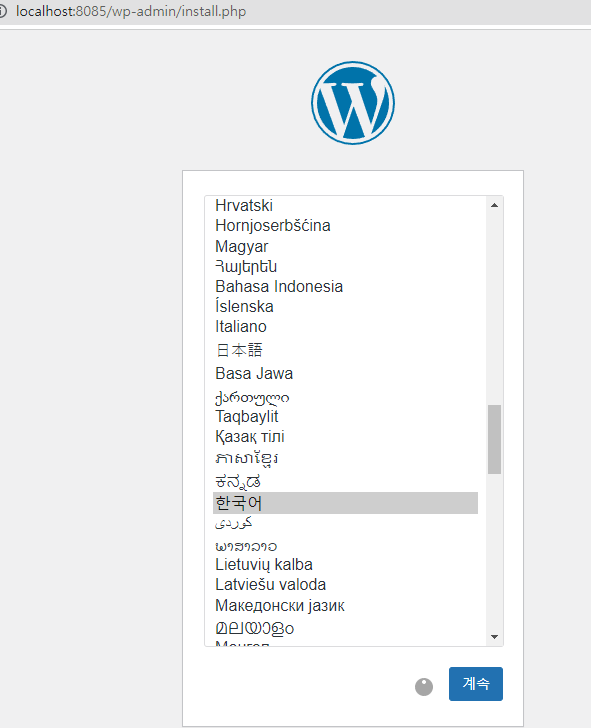

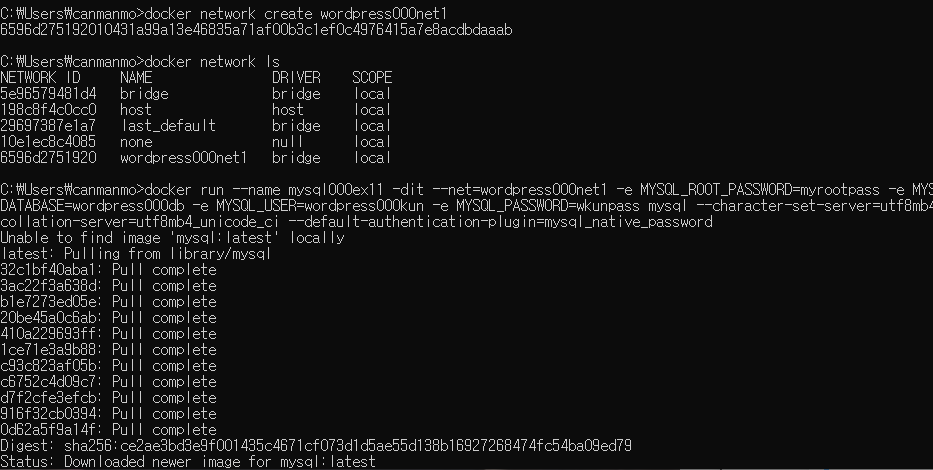

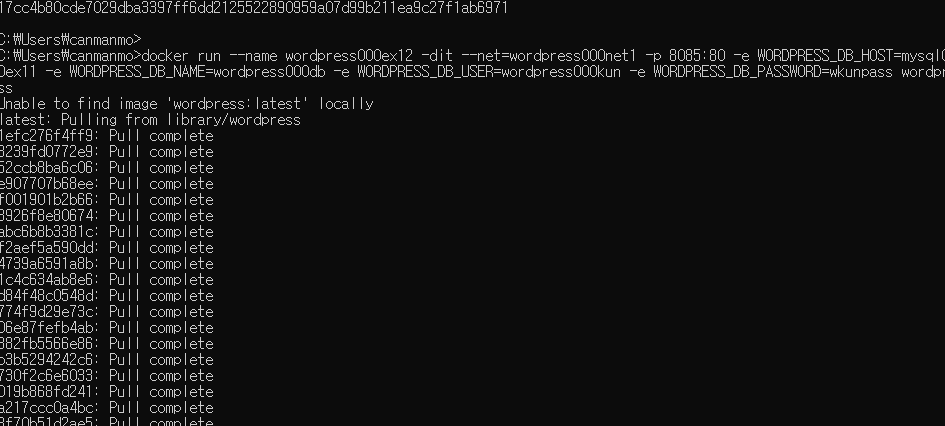

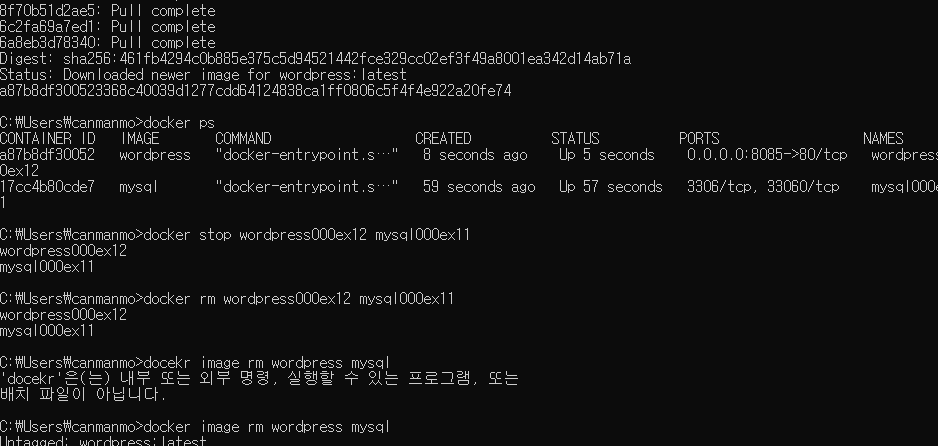

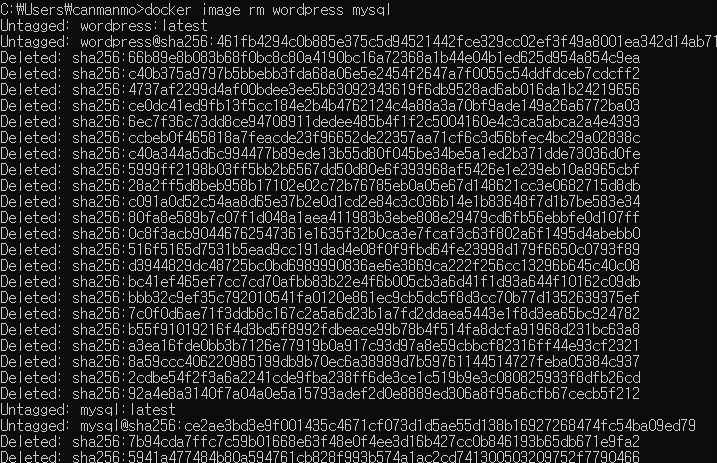